In [ ]:
pip install yfinance tensorflow

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Fetch data for HDFC Bank from Yahoo Finance (India NSE)
df = yf.download('HDFCBANK.NS', start='2015-01-01', end='2025-06-15')
df = df[['Close']]
print(df.tail())

<ipython-input-13-3949619051>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('HDFCBANK.NS', start='2015-01-01', end='2025-06-15')
[*********************100%***********************]  1 of 1 completed

Price             Close
Ticker      HDFCBANK.NS
Date                   
2025-06-09  1978.900024
2025-06-10  1965.300049
2025-06-11  1950.400024
2025-06-12  1943.400024
2025-06-13  1917.599976


Preprocess Data

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

Build & Train the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0553
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.3910e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 7.3766e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 6.5698e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 6.9603e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.6416e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 5.1300e-04
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 5.3441e-04
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.6339e-04
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 4.9938e-04


Predict on Full Dataset

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


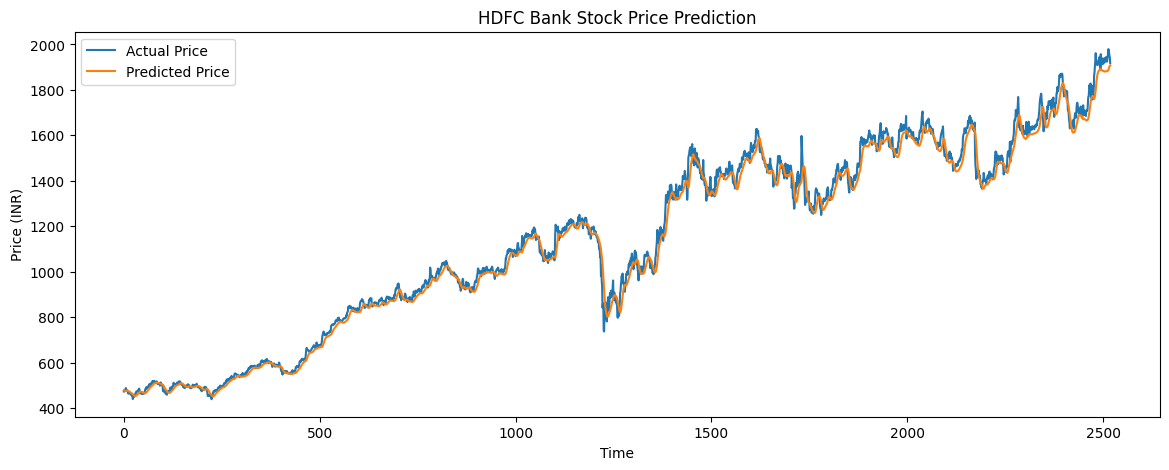

In [ ]:
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y)

plt.figure(figsize=(14,5))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('HDFC Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

Real-Time Prediction on Latest Data

In [ ]:
# Get the last 60 days of data
latest_data = df[-60:].values
latest_scaled = scaler.transform(latest_data)
latest_scaled = latest_scaled.reshape(1, time_step, 1)

# Predict the next day's price
predicted_price_scaled = model.predict(latest_scaled)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted Next Closing Price: ₹{predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Next Closing Price: ₹1905.38
